In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (15, 6)
plt.rcParams['font.size'] = 10

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
df = pd.read_csv(Path('../data/PRSA_data_2010.1.1-2014.12.31_Beijing.csv'))

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [3]:
df.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,12651.043435,1.413842,3.448572,8.799425,6.922266,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


In [7]:
#check that there are no missing dates
date_range = pd.date_range(start='2010-01-01', end='2014-12-31 23:00:00', freq='H')
df['date'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
missing_dates = date_range.difference(df['date'])
print(f"Missing dates: {missing_dates}")
# clean up
df.drop(columns=['date'], inplace=True)

Missing dates: DatetimeIndex([], dtype='datetime64[ns]', freq='h')


In [5]:
# check if every variable is supposed to be categorical is actually categorical:
categorical_columns = ['year', 'month', 'day', 'hour', 'cbwd','Is','Ir']
for col in categorical_columns:
    unique_values = df[col].unique()
    print(f"\nColumn '{col}' unique values ({len(unique_values)}): {unique_values}")


Column 'year' unique values (5): [2010 2011 2012 2013 2014]

Column 'month' unique values (12): [ 1  2  3  4  5  6  7  8  9 10 11 12]

Column 'day' unique values (31): [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]

Column 'hour' unique values (24): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]

Column 'cbwd' unique values (4): ['NW' 'cv' 'NE' 'SE']

Column 'Is' unique values (28): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 19 20 21 22 23 24 25
 26 27 14 18]

Column 'Ir' unique values (37): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


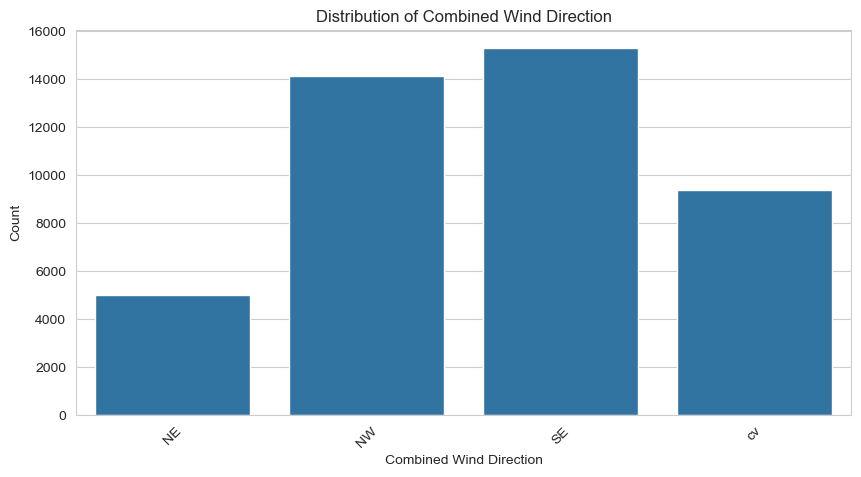

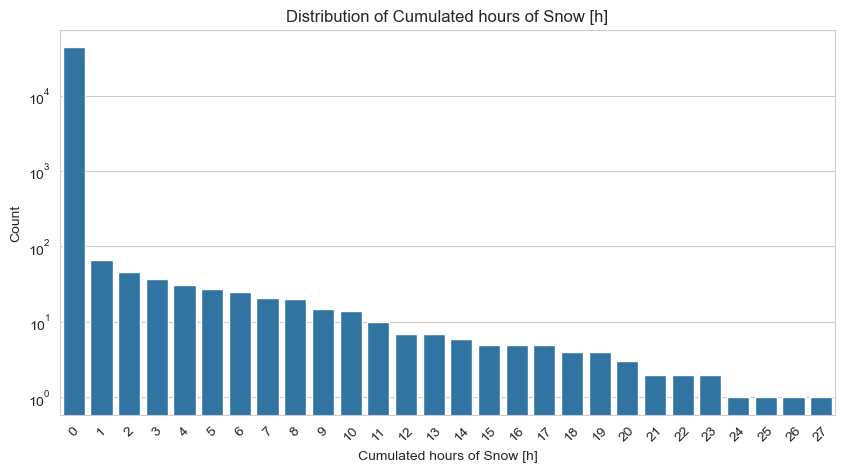

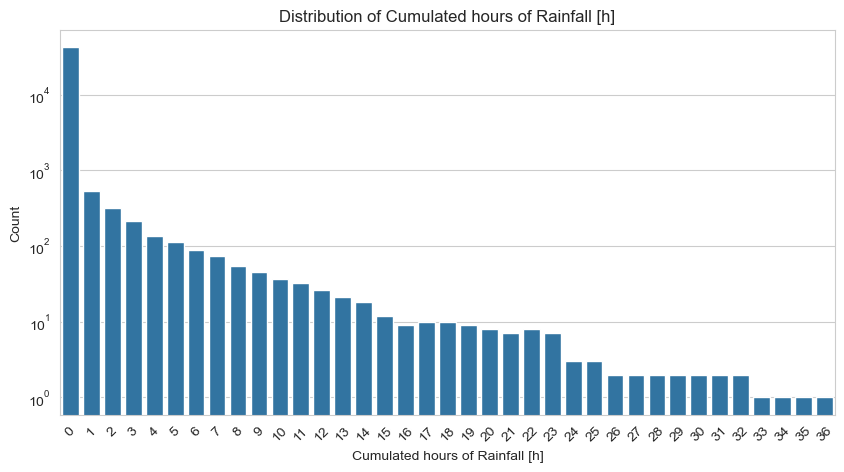

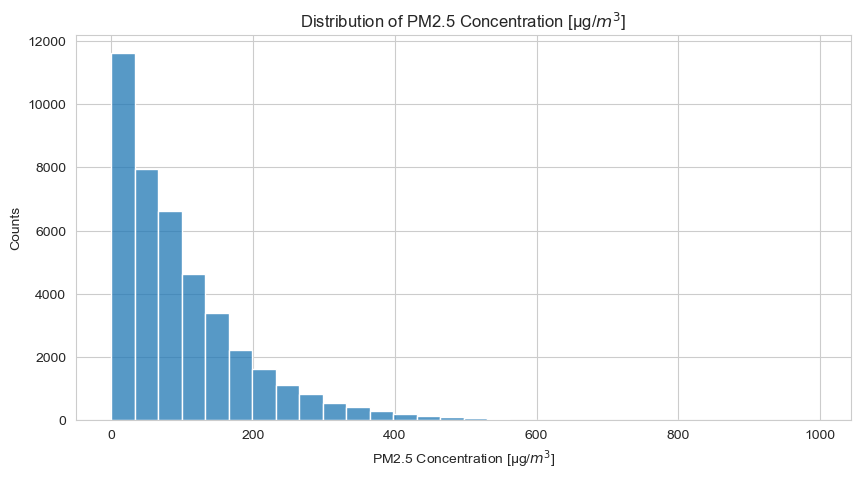

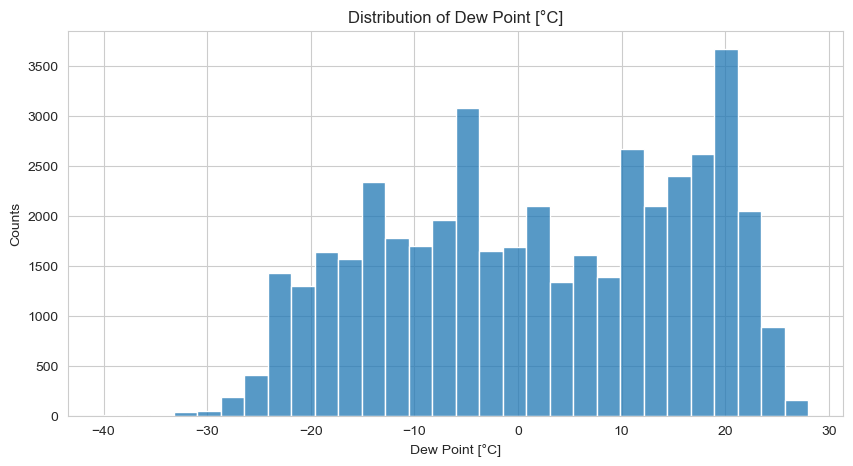

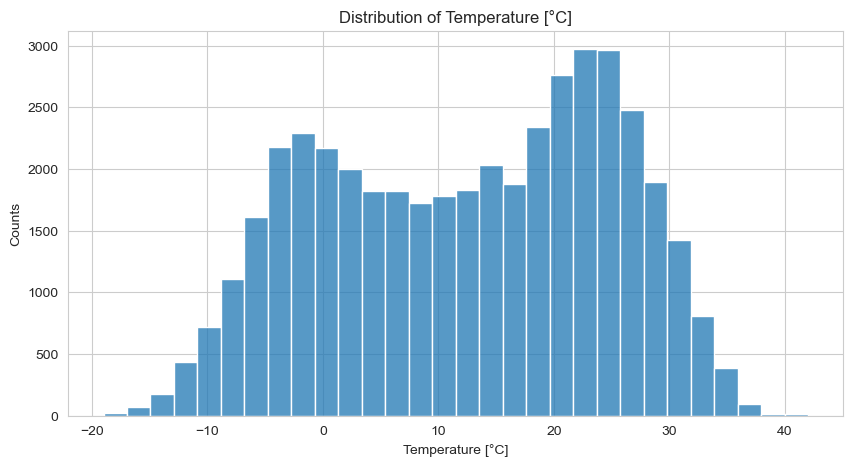

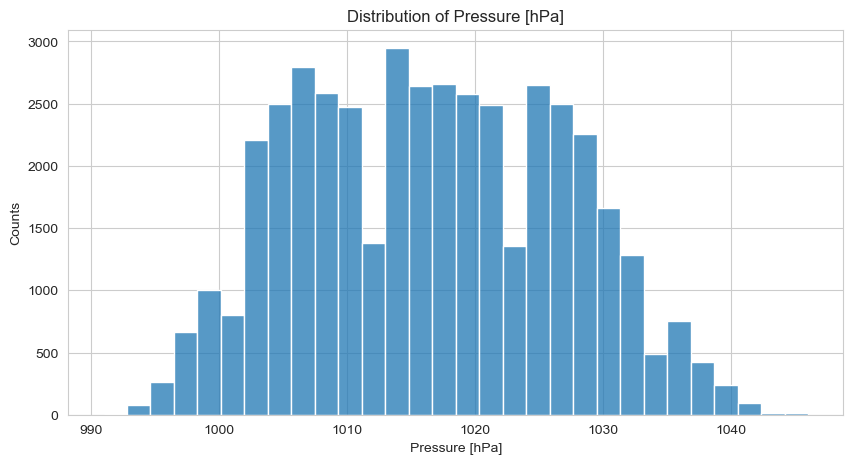

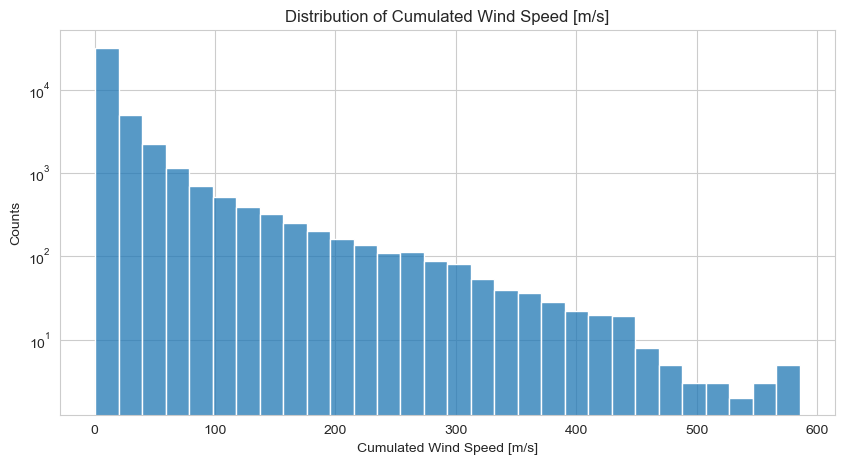

In [56]:
def plot_feature_distributions(df, categorical_columns=None, exclude_cols=None):
    """
    Create bar plots for categorical variables and histograms for numerical ones.
    
    Args:
        df: DataFrame to visualize
        categorical_columns: List of categorical column names (default: ['year', 'month', 'day', 'hour', 'cbwd', 'Is', 'Ir'])
        exclude_cols: List of columns to exclude from numerical plots (default: ['No'])
    """
    if categorical_columns is None:
        categorical_columns = [
            'year', 'month', 'day', 'hour', 'cbwd', 'Is', 'Ir']
    
    if exclude_cols is None:
        exclude_cols = ['No']
    
    # Get numerical columns
    numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
    
    # Remove excluded columns
    for col in exclude_cols:
        if col in numerical_columns:
            numerical_columns.remove(col)
        if col in categorical_columns:
            categorical_columns.remove(col)
    
    # Remove categorical columns from numerical list
    for col in categorical_columns:
        if col in numerical_columns:
            numerical_columns.remove(col)
    # give human readable titles
    titles = {'pm2.5': 'PM2.5 Concentration [µg/$m^3$]',
              'DEWP': 'Dew Point [°C]',
              'TEMP': 'Temperature [°C]',
              'PRES': 'Pressure [hPa]',
              'Is': 'Cumulated hours of Snow [h]',
              'Iws': 'Cumulated Wind Speed [m/s]',
              'Ir': 'Cumulated hours of Rainfall [h]',
              'cbwd': 'Combined Wind Direction',
              'year': 'Year',
              'month': 'Month', 
              'day': 'Day',
              'hour': 'Hour'
    }

    # Bar plots for categorical variables (apply log scale if column starts with 'I')
    for col in categorical_columns:
        if col not in df.columns:
            continue
            
        plt.figure(figsize=(10, 5))
        # Numerical ordering
        sns.countplot(data=df, x=col, order=sorted(df[col].unique()))
        plt.title(f'Distribution of {titles.get(col, col)}')
        plt.xticks(rotation=45)
        plt.xlabel(titles.get(col, col))
        
        if col.startswith('I'):
            plt.yscale('log')
        plt.ylabel('Count')
        plt.show()

    # Histograms for numerical variables (apply log scale if column starts with 'I')
    for col in numerical_columns:
        plt.figure(figsize=(10, 5))
        sns.histplot(data=df, x=col, bins=30)
        plt.title(f'Distribution of {titles.get(col, col)}')
        plt.xlabel(titles.get(col, col))
        
        if col.startswith('I'):
            plt.yscale('log')
        plt.ylabel('Counts')
        plt.show()


# Use the function
plot_feature_distributions(df,exclude_cols=['No','year','month','day','hour'])

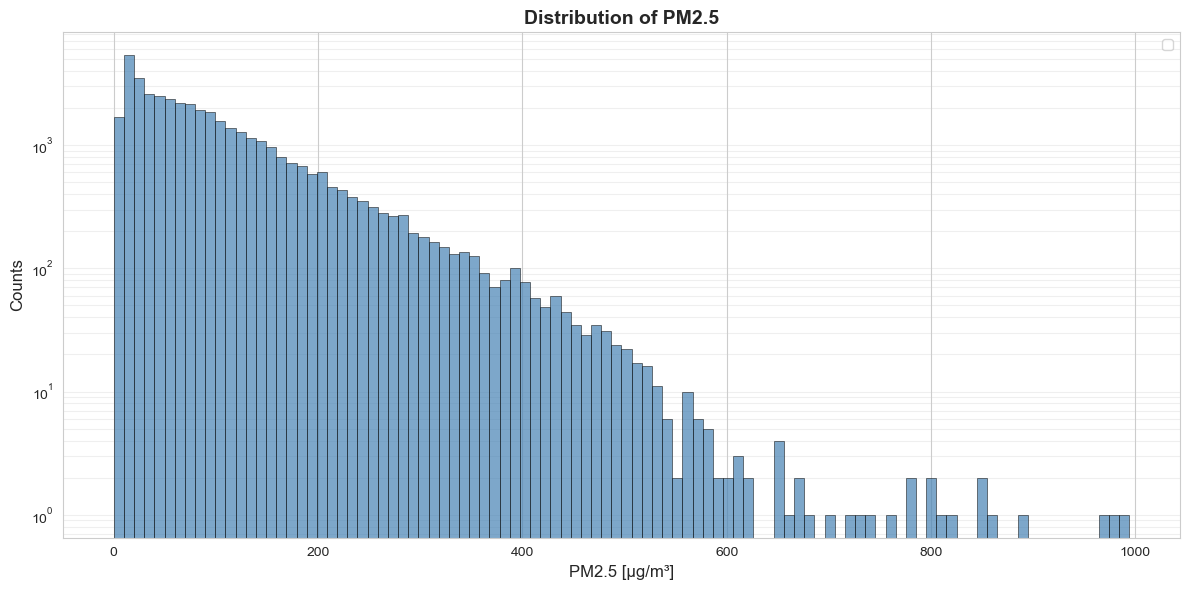

In [16]:
# Istogramma PM2.5
plt.figure(figsize=(12, 6))

# Calcola istogramma manualmente
counts, bins = np.histogram(df['pm2.5'].dropna(), bins=100)
bin_centers = 0.5 * (bins[1:] + bins[:-1])
bin_width = bins[1] - bins[0]

# Crea il grafico a barre con barre di errore
plt.bar(bin_centers, counts, width=bin_width, 
        color='steelblue', alpha=0.7, edgecolor='black', linewidth=0.5)

# vertical line at 580
plt.xlabel('PM2.5 [μg/m³]', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title('Distribution of PM2.5', 
         fontsize=14, fontweight='bold')
plt.yscale('log')
plt.grid(True, alpha=0.3, axis='y', which='both')
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

Top 6 Highest PM2.5 Values (with ±50h tolerance):
 1. 2012-01-23 01:00:00 → 994.00 μg/m³
 2. 2010-02-14 01:00:00 → 980.00 μg/m³
 3. 2013-01-12 20:00:00 → 886.00 μg/m³
 4. 2010-03-22 10:00:00 → 784.00 μg/m³
 5. 2010-03-20 04:00:00 → 700.00 μg/m³
 6. 2014-01-16 04:00:00 → 671.00 μg/m³


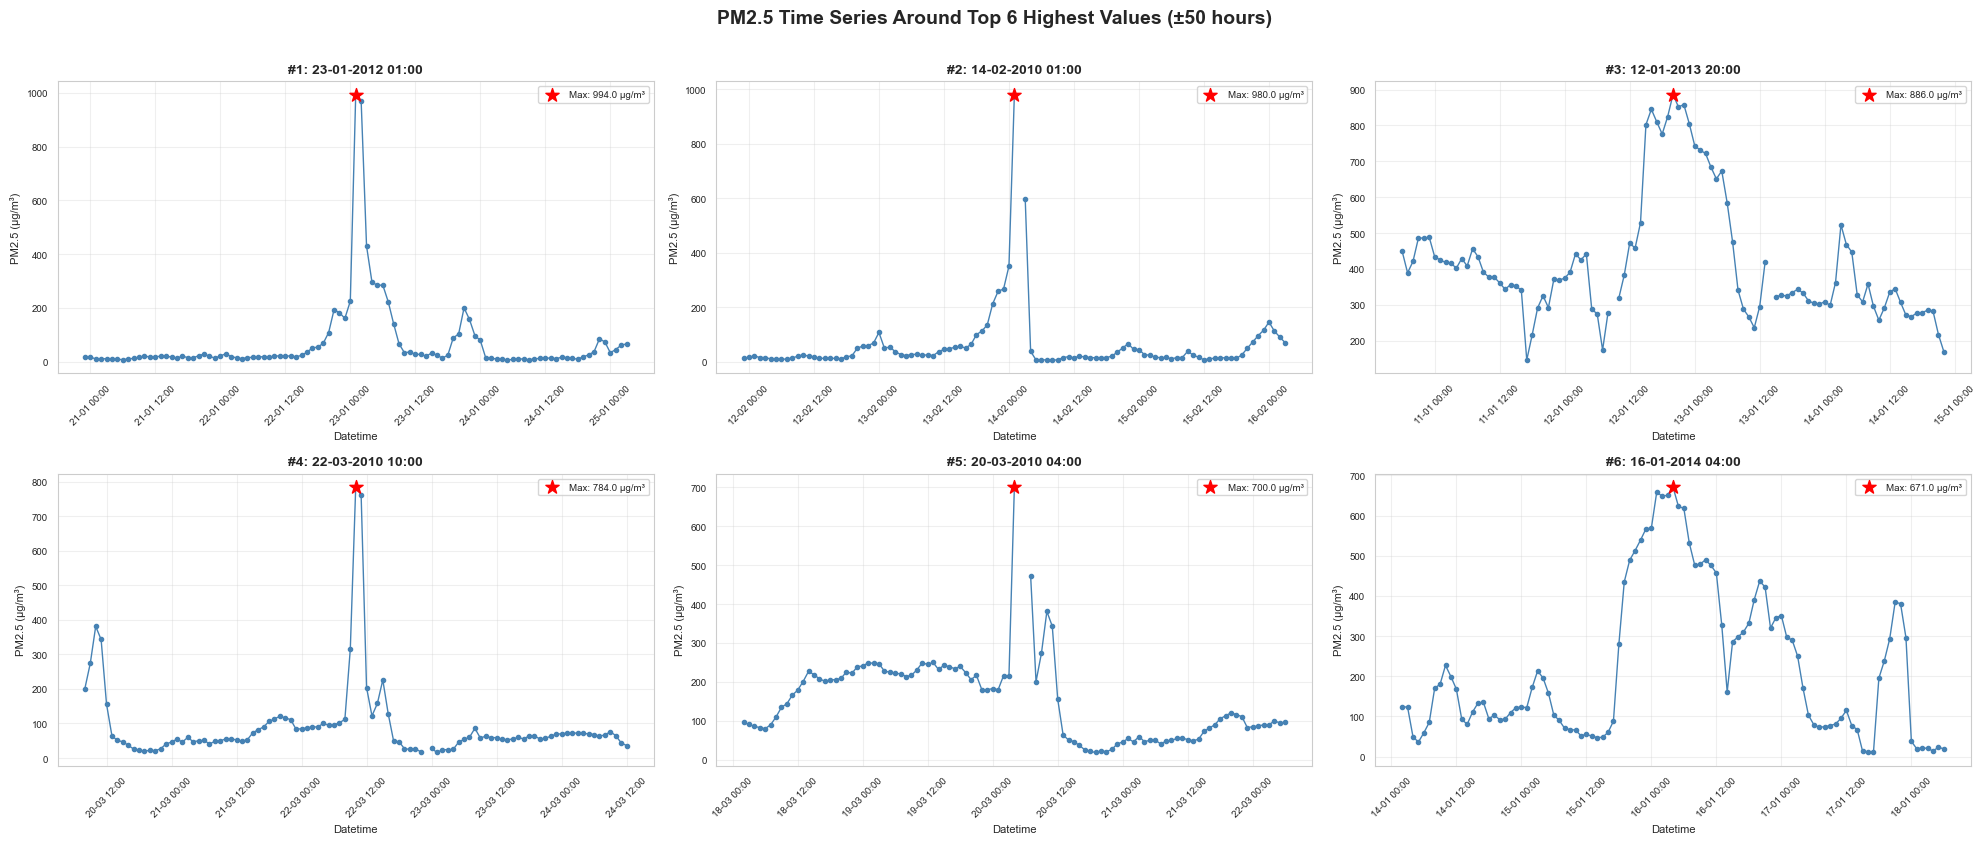

In [22]:
from datetime import timedelta
# Display 100 values around the top 20 highest PM2.5 values (with tolerance to avoid duplicates)
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df.set_index('datetime', inplace=True)

# Find top highest PM2.5 values and filter by tolerance
tolerance_hours = 50  # Hours of tolerance to avoid overlapping windows
all_high_values = df['pm2.5'].nlargest(100).index  # Get top 100 to have enough candidates

# Filter indices to avoid overlaps
selected_indices = []
for idx in all_high_values:
    # Check if this index is too close to any already selected
    is_too_close = False
    for selected_idx in selected_indices:
        time_diff = abs((idx - selected_idx).total_seconds() / 3600)  # Difference in hours
        if time_diff <= tolerance_hours:
            is_too_close = True
            break
    
    if not is_too_close:
        selected_indices.append(idx)
    
    # Stop when we have 5 distinct peaks
    if len(selected_indices) >= 6:
        break

print(f"Top {len(selected_indices)} Highest PM2.5 Values (with ±{tolerance_hours}h tolerance):")
print("=" * 90)
for i, idx in enumerate(selected_indices, 1):
    value = df.loc[idx, 'pm2.5']
    print(f"{i:2d}. {idx} → {value:.2f} μg/m³")
print("=" * 90)

# Create subplots for selected peaks
n_cols = 3
n_rows = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 8))
axes = axes.flatten()

for i, pm25_max_idx in enumerate(selected_indices):
    start_idx = pm25_max_idx - timedelta(hours=50)
    end_idx = pm25_max_idx + timedelta(hours=50)
    
    df_subset = df.loc[start_idx:end_idx]
    
    ax = axes[i]
    ax.plot(df_subset.index, df_subset['pm2.5'], marker='o', linestyle='-', 
            markersize=3, linewidth=1, color='steelblue')
    
    # Highlight the max value
    ax.scatter([pm25_max_idx], [df.loc[pm25_max_idx, 'pm2.5']], 
              color='red', s=100, zorder=5, marker='*', 
              label=f'Max: {df.loc[pm25_max_idx, "pm2.5"]:.1f} μg/m³')
    
    ax.set_title(f'#{i+1}: {pm25_max_idx.strftime("%d-%m-%Y %H:00")}', 
                fontsize=10, fontweight='bold')
    ax.set_xlabel('Datetime', fontsize=8)
    ax.set_ylabel('PM2.5 (μg/m³)', fontsize=8)
    ax.tick_params(axis='x', rotation=45, labelsize=7)
    ax.tick_params(axis='y', labelsize=7)
    ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%d-%m %H:00'))
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=7, loc='upper right')

plt.tight_layout()
plt.suptitle('PM2.5 Time Series Around Top 6 Highest Values (±50 hours)', 
            fontsize=14, fontweight='bold', y=1.05)
plt.show()

df.reset_index(inplace=True)

In [26]:
df.reset_index(inplace=True)

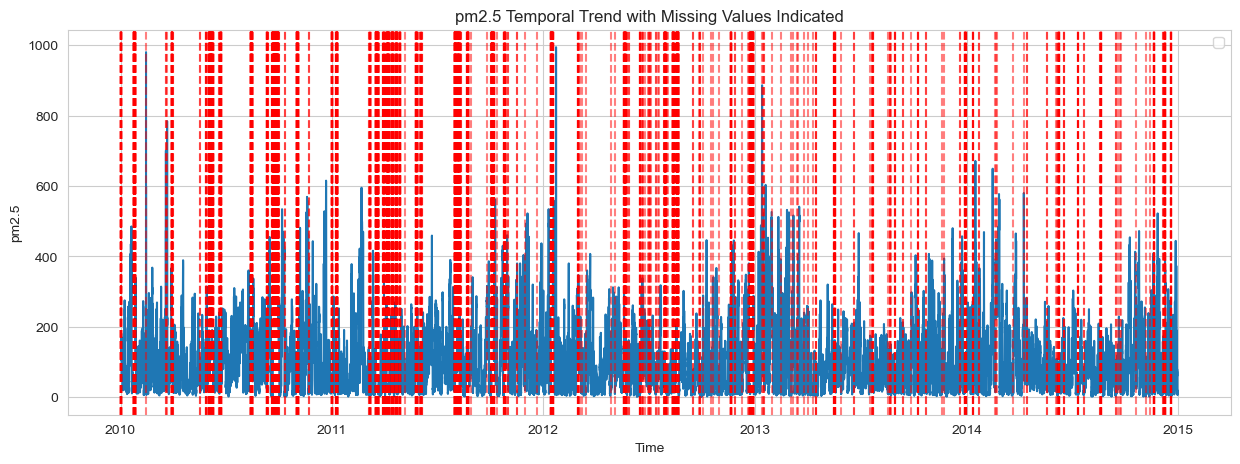

In [27]:
# plot pm2.5 temporal trend with a red vertical line indicating missing values
plt.figure(figsize=(15, 5))
# set datetime as index again
df.set_index('datetime', inplace=True)
plt.plot(df.index, df['pm2.5'])
for idx in df[df['pm2.5'].isna()].index:
    plt.axvline(x=idx, color='red', linestyle='--', alpha=0.5)
plt.xlabel('Time')
plt.ylabel('pm2.5')
plt.title('pm2.5 Temporal Trend with Missing Values Indicated')
plt.legend()
plt.show()
df.reset_index(inplace=True)

In [28]:
missing_pm25_df = df[df['pm2.5'].isna()]

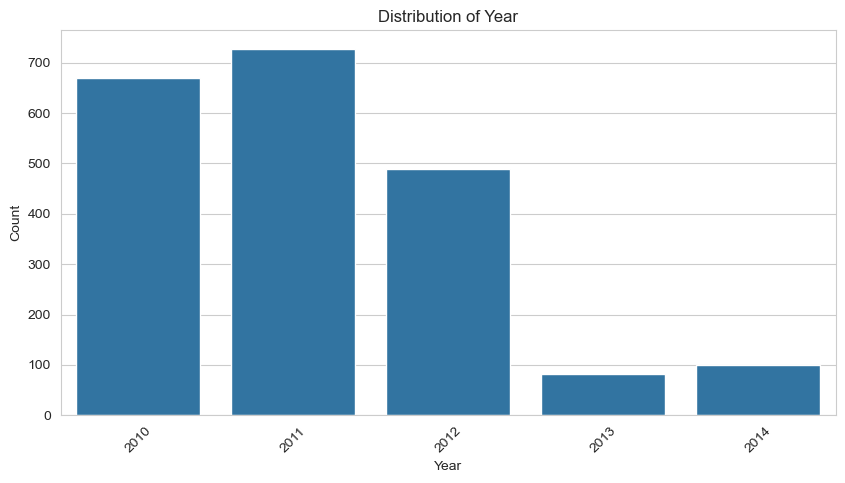

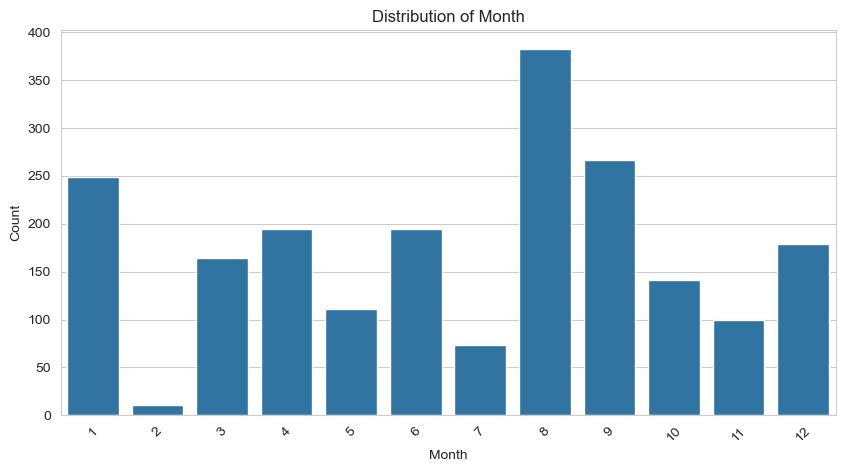

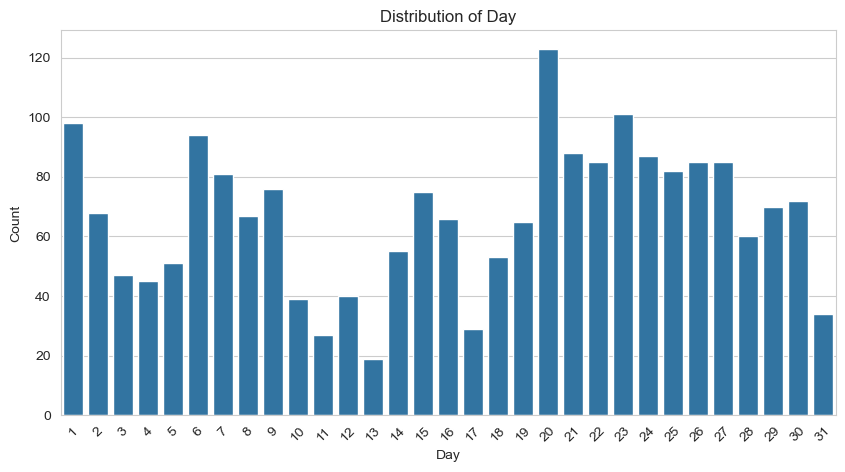

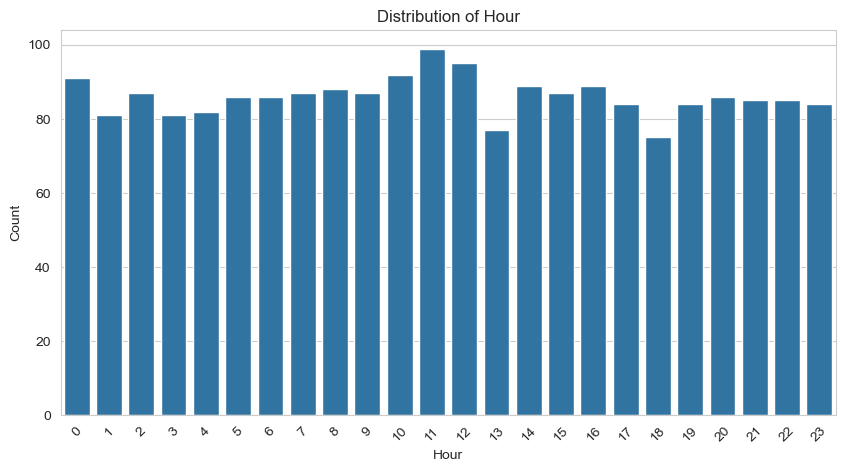

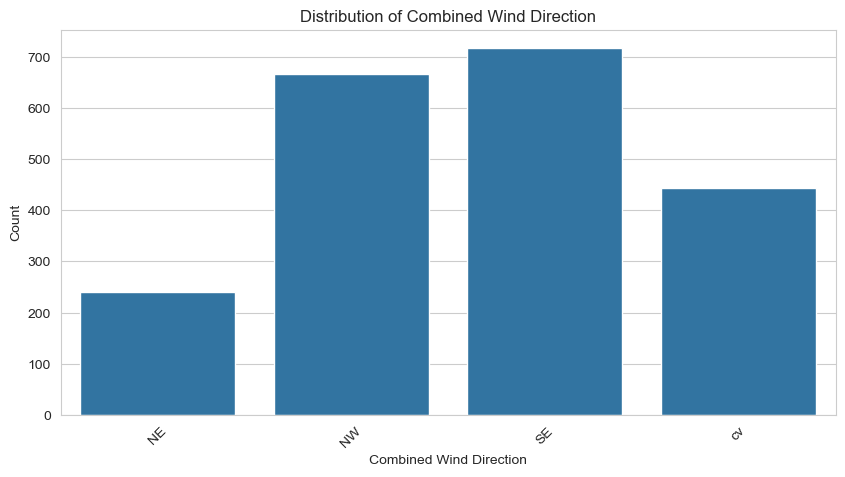

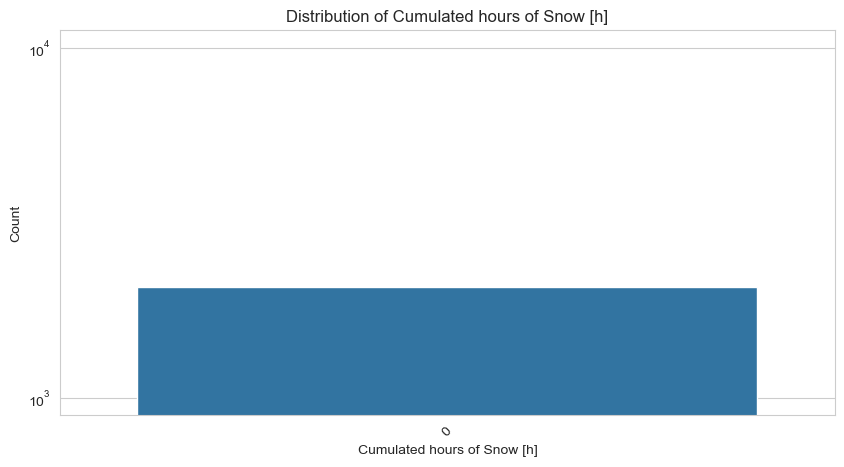

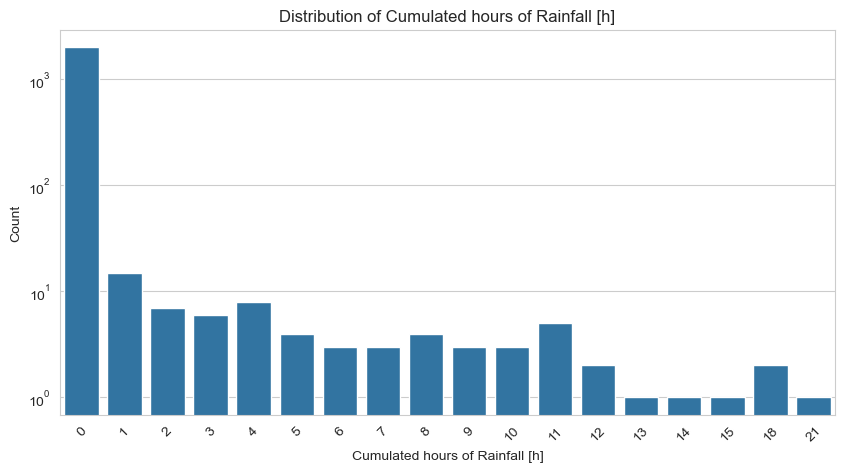

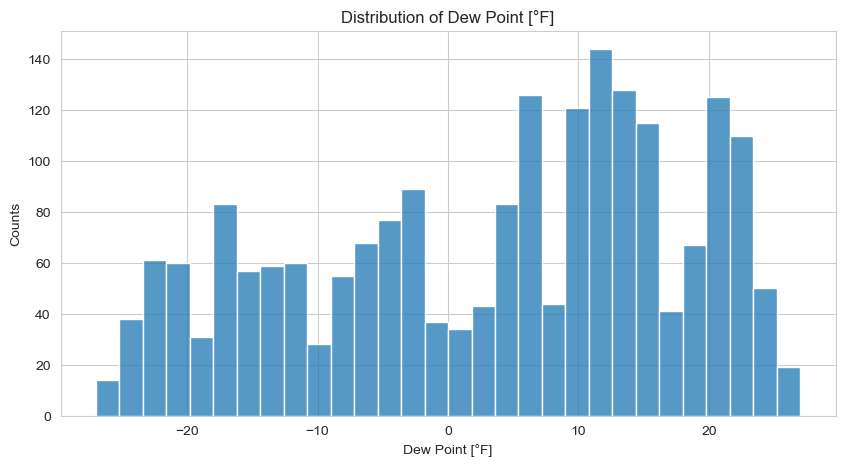

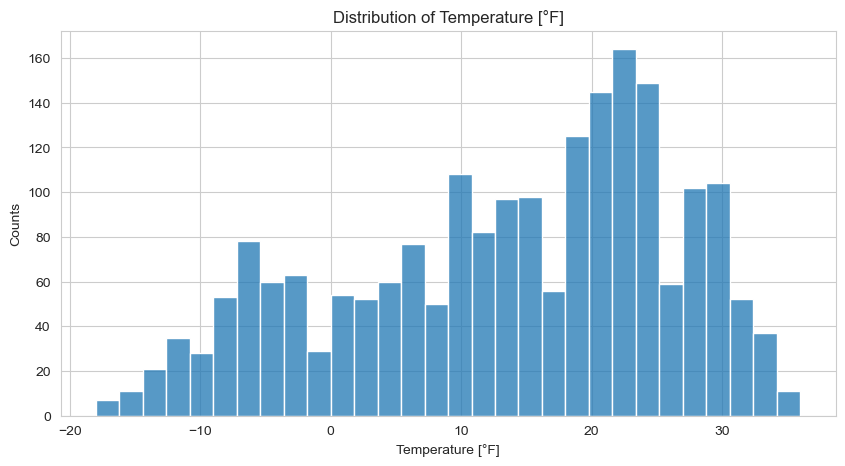

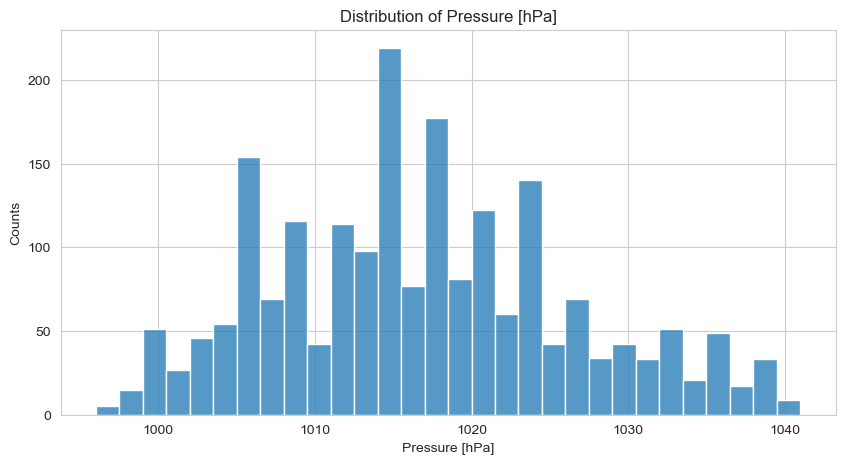

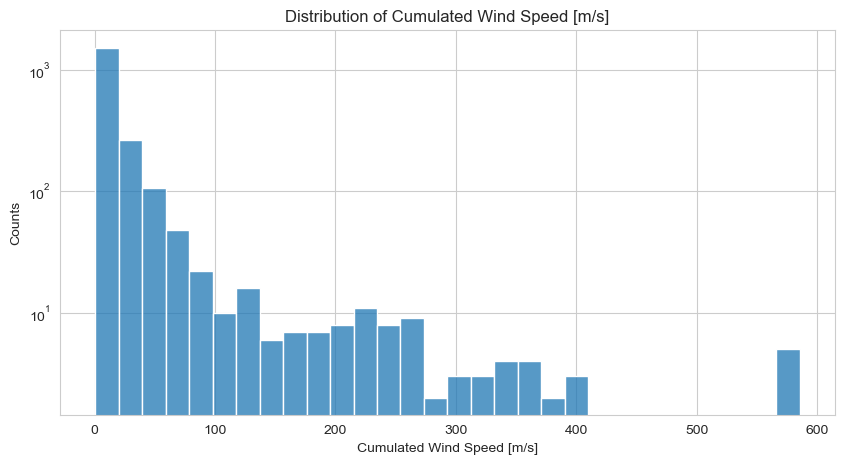

In [30]:
plot_feature_distributions(missing_pm25_df, exclude_cols=['No','pm2.5'])


CONTINUOUS DATA CHUNKS ANALYSIS (minimum 100 consecutive values)

Total number of valid chunks: 96
Total records in valid chunks: 38,471 (87.79% of dataset)

Chunk size statistics:
  - Shortest chunk: 100 hours
  - Longest chunk: 1330 hours (55.4 days)
  - Average chunk: 400.7 hours (16.7 days)
  - Median chunk: 308.0 hours (12.8 days)

CHUNK SIZE DISTRIBUTION
  1-7 days       :   13 chunks
  1-4 weeks      :   73 chunks
  1-3 months     :   10 chunks

TOP 10 LARGEST CONTINUOUS CHUNKS


,chunk_id,start_index,end_index,size_hours,size_days,start_year,start_month,start_day,start_hour,end_year,end_month,end_day,end_hour
22,136,12515,13844,1330,55.416667,2011,6,6,11,2011,7,31,20
16,54,8992,10315,1324,55.166667,2011,1,10,16,2011,3,6,19
8,34,4162,5395,1234,51.416667,2010,6,23,10,2010,8,13,19
4,18,2173,3280,1108,46.166667,2010,4,1,13,2010,5,17,16
36,196,19289,20342,1054,43.916667,2012,3,14,17,2012,4,27,14
34,186,17916,18945,1030,42.916667,2012,1,17,12,2012,2,29,9
14,50,7813,8759,947,39.458333,2010,11,22,13,2010,12,31,23
82,374,37554,38410,857,35.708333,2014,4,14,18,2014,5,20,10
2,6,1059,1876,818,34.083333,2010,2,14,3,2010,3,20,4
63,320,28842,29583,742,30.916667,2013,4,16,18,2013,5,17,15


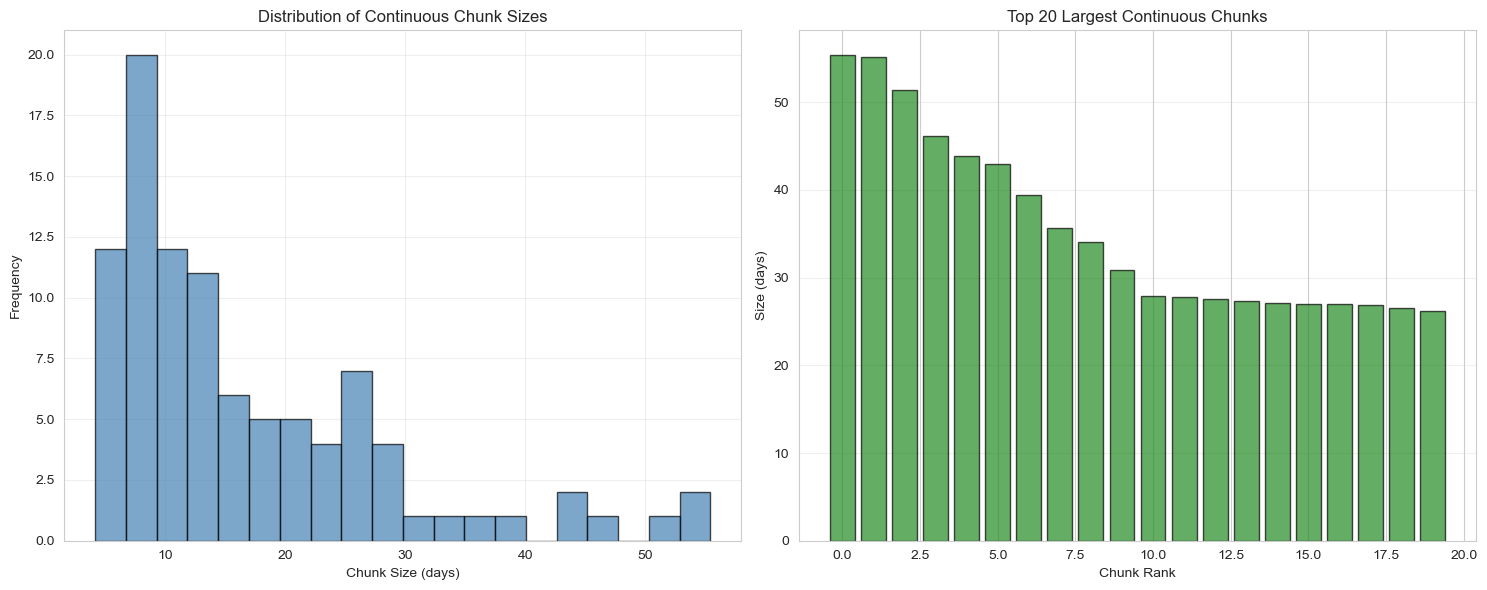


DATAFRAMES CREATED
✅ 'chunks_df': 38,471 valid rows from 96 chunks
   Columns: all original columns + chunk metadata
   - chunk_id: unique identifier for each chunk
   - chunk_size_hours: size of the chunk in hours
   - chunk_size_days: size of the chunk in days
   - chunk_start_index: start index of the chunk
   - chunk_end_index: end index of the chunk

✅ 'chunk_summary_df': 96 rows (one per chunk)
   Summary information for each chunk

Sample of chunks_df:


,datetime,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,chunk_id,chunk_size_hours,chunk_size_days,chunk_start_index,chunk_end_index
24,2010-01-02 00:00:00,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0,2,521,21.708333,24,544
25,2010-01-02 01:00:00,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,2,521,21.708333,24,544
26,2010-01-02 02:00:00,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,2,521,21.708333,24,544
27,2010-01-02 03:00:00,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,2,521,21.708333,24,544
28,2010-01-02 04:00:00,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,2,521,21.708333,24,544
29,2010-01-02 05:00:00,30,2010,1,2,5,109.0,-7,-6.0,1022.0,SE,7.14,3,0,2,521,21.708333,24,544
30,2010-01-02 06:00:00,31,2010,1,2,6,105.0,-7,-6.0,1023.0,SE,8.93,4,0,2,521,21.708333,24,544
31,2010-01-02 07:00:00,32,2010,1,2,7,124.0,-7,-5.0,1024.0,SE,10.72,0,0,2,521,21.708333,24,544
32,2010-01-02 08:00:00,33,2010,1,2,8,120.0,-8,-6.0,1024.0,SE,12.51,0,0,2,521,21.708333,24,544
33,2010-01-02 09:00:00,34,2010,1,2,9,132.0,-7,-5.0,1025.0,SE,14.30,0,0,2,521,21.708333,24,544


In [35]:
def identify_continuous_chunks(df, target_col='pm2.5', min_consecutive=50, visualize=True, verbose=True):
    """
    Identify continuous chunks of data without missing values in the target column.
    
    Args:
        df: DataFrame to analyze
        target_col: Name of the column to check for missing values (default: 'pm2.5')
        min_consecutive: Minimum number of consecutive non-missing values required (default: 50)
        visualize: Whether to create visualization plots (default: True)
        verbose: Whether to print detailed information (default: True)
    
    Returns:
        tuple: (chunks_df, chunk_summary_df)
            - chunks_df: DataFrame with all valid rows and chunk metadata
            - chunk_summary_df: DataFrame with one row per chunk containing summary info
    """
    # Create a working copy
    df_work = df.copy()
    
    # Create a column to mark missing values
    df_work['target_missing'] = df_work[target_col].isna().astype(int)
    
    # Create blocks: each time missing status changes, start a new block
    df_work['block_id'] = (df_work['target_missing'].diff(1) != 0).astype(int).cumsum()
    
    # Get only non-missing blocks
    valid_blocks = df_work[df_work['target_missing'] == 0].groupby('block_id').size()
    
    # Filter blocks with at least min_consecutive values
    good_blocks = valid_blocks[valid_blocks >= min_consecutive]
    
    if verbose:
        print(f"\n{'='*80}")
        print(f"CONTINUOUS DATA CHUNKS ANALYSIS (minimum {min_consecutive} consecutive values)")
        print(f"{'='*80}")
        print(f"\nTotal number of valid chunks: {len(good_blocks)}")
        print(f"Total records in valid chunks: {good_blocks.sum():,} ({good_blocks.sum()/len(df)*100:.2f}% of dataset)")
        print(f"\nChunk size statistics:")
        print(f"  - Shortest chunk: {good_blocks.min()} hours")
        print(f"  - Longest chunk: {good_blocks.max()} hours ({good_blocks.max()/24:.1f} days)")
        print(f"  - Average chunk: {good_blocks.mean():.1f} hours ({good_blocks.mean()/24:.1f} days)")
        print(f"  - Median chunk: {good_blocks.median():.1f} hours ({good_blocks.median()/24:.1f} days)")
        
        # Show distribution of chunk sizes
        print(f"\n{'='*80}")
        print("CHUNK SIZE DISTRIBUTION")
        print(f"{'='*80}")
        size_ranges = [
            (min_consecutive, 167, "1-7 days"),
            (168, 719, "1-4 weeks"),
            (720, 2159, "1-3 months"),
            (2160, 8759, "3-12 months"),
            (8760, float('inf'), ">1 year")
        ]
        
        for min_size, max_size, label in size_ranges:
            count = ((good_blocks >= min_size) & (good_blocks < max_size)).sum()
            if count > 0:
                print(f"  {label:15s}: {count:4d} chunks")
    
    # Create summary dataframe with chunk information
    chunk_summary = []
    for block_id, size in good_blocks.items():
        block_data = df_work[df_work['block_id'] == block_id]
        start_idx = block_data.index[0]
        end_idx = block_data.index[-1]
        
        chunk_summary.append({
            'chunk_id': block_id,
            'start_index': start_idx,
            'end_index': end_idx,
            'size_hours': size,
            'size_days': size / 24,
            'start_year': block_data.iloc[0]['year'],
            'start_month': block_data.iloc[0]['month'],
            'start_day': block_data.iloc[0]['day'],
            'start_hour': block_data.iloc[0]['hour'],
            'end_year': block_data.iloc[-1]['year'],
            'end_month': block_data.iloc[-1]['month'],
            'end_day': block_data.iloc[-1]['day'],
            'end_hour': block_data.iloc[-1]['hour']
        })
    
    chunk_summary_df = pd.DataFrame(chunk_summary).sort_values('size_hours', ascending=False)
    
    if verbose:
        print(f"\n{'='*80}")
        print("TOP 10 LARGEST CONTINUOUS CHUNKS")
        print(f"{'='*80}")
        display(chunk_summary_df.head(10))
    
    # Create chunks_df: all valid rows with chunk metadata
    chunks_df = df_work[df_work['block_id'].isin(good_blocks.index)].copy()
    
    # Add chunk metadata to each row
    chunk_metadata = {}
    for block_id, size in good_blocks.items():
        block_data = df_work[df_work['block_id'] == block_id]
        chunk_metadata[block_id] = {
            'chunk_size_hours': size,
            'chunk_size_days': size / 24,
            'chunk_start_index': block_data.index[0],
            'chunk_end_index': block_data.index[-1]
        }
    
    # Map metadata to each row
    chunks_df['chunk_id'] = chunks_df['block_id']
    chunks_df['chunk_size_hours'] = chunks_df['chunk_id'].map(lambda x: chunk_metadata[x]['chunk_size_hours'])
    chunks_df['chunk_size_days'] = chunks_df['chunk_id'].map(lambda x: chunk_metadata[x]['chunk_size_days'])
    chunks_df['chunk_start_index'] = chunks_df['chunk_id'].map(lambda x: chunk_metadata[x]['chunk_start_index'])
    chunks_df['chunk_end_index'] = chunks_df['chunk_id'].map(lambda x: chunk_metadata[x]['chunk_end_index'])
    
    # Remove temporary columns
    chunks_df.drop(columns=['target_missing', 'block_id'], inplace=True)
    
    # Visualize chunk sizes
    if visualize:
        plt.figure(figsize=(15, 6))
        plt.subplot(1, 2, 1)
        plt.hist(good_blocks / 24, bins=20, edgecolor='black', alpha=0.7, color='steelblue')
        plt.xlabel('Chunk Size (days)')
        plt.ylabel('Frequency')
        plt.title('Distribution of Continuous Chunk Sizes')
        plt.grid(True, alpha=0.3)
        
        plt.subplot(1, 2, 2)
        plt.bar(range(min(20, len(chunk_summary_df))), chunk_summary_df['size_days'].head(20), 
                color='forestgreen', alpha=0.7, edgecolor='black')
        plt.xlabel('Chunk Rank')
        plt.ylabel('Size (days)')
        plt.title('Top 20 Largest Continuous Chunks')
        plt.grid(True, alpha=0.3, axis='y')
        plt.tight_layout()
        plt.show()
    
    if verbose:
        # Print summary
        print(f"\n{'='*80}")
        print("DATAFRAMES CREATED")
        print(f"{'='*80}")
        print(f"✅ 'chunks_df': {len(chunks_df):,} valid rows from {len(good_blocks)} chunks")
        print(f"   Columns: all original columns + chunk metadata")
        print(f"   - chunk_id: unique identifier for each chunk")
        print(f"   - chunk_size_hours: size of the chunk in hours")
        print(f"   - chunk_size_days: size of the chunk in days")
        print(f"   - chunk_start_index: start index of the chunk")
        print(f"   - chunk_end_index: end index of the chunk")
        print(f"\n✅ 'chunk_summary_df': {len(chunk_summary_df)} rows (one per chunk)")
        print(f"   Summary information for each chunk")
        
        # Show sample of chunks_df
        print(f"\nSample of chunks_df:")
        display(chunks_df.head(10))
    
    return chunks_df, chunk_summary_df


# Use the function
chunks_df, chunk_summary_df = identify_continuous_chunks(df, target_col='pm2.5', min_consecutive=100)

In [36]:
def categorize_pm25(pm25_values: pd.Series, method: str = 'epa') -> pd.Series:
    """
    Categorize PM2.5 values into air quality levels.
    
    Args:
        pm25_values: Series of PM2.5 values
        method: Categorization method ('epa' or 'custom')
        
    Returns:
        Series of categorical labels
    """
    if method == 'epa':
        # Based on EPA Air Quality Index
        bins = [0, 9, 35, 55, 125, 225, float('inf')]
        labels = ['Good', 'Moderate', 'Unhealthy_Sensitive', 'Unhealthy', 'Very_Unhealthy', 'Hazardous']
    elif method == 'custom':
        # Custom 4-class categorization
        bins = [0, 12, 35, 150, float('inf')]
        labels = ['Good', 'Moderate', 'Unhealthy', 'Hazardous']
    else:
        raise ValueError(f"Unknown method: {method}")
    
    categories = pd.cut(pm25_values, bins=bins, labels=labels, include_lowest=True)
    return categories

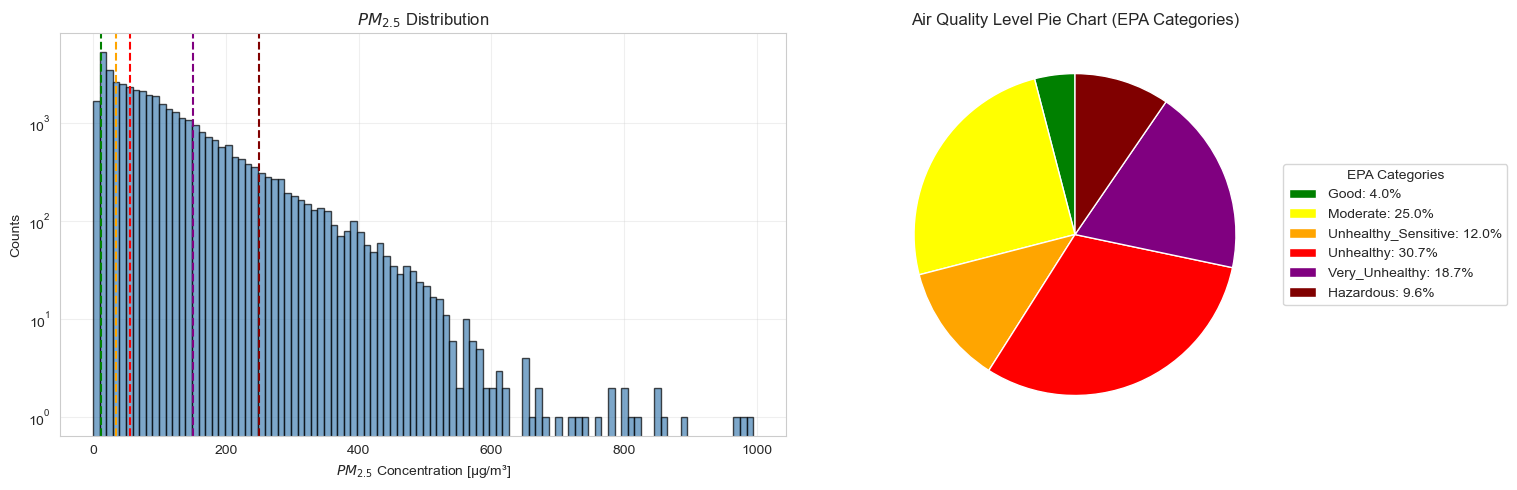

In [42]:
# Identify PM2.5 column
pm25_data = df['pm2.5'].dropna()
    
# Create air quality categories
categories = categorize_pm25(pm25_data, method='epa')

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Histogram
axes[0].hist(pm25_data, bins=100, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].set_xlabel('$PM_{2.5}$ Concentration [µg/m³]')
axes[0].set_ylabel('Counts')
axes[0].set_title('$PM_{2.5}$ Distribution')
axes[0].grid(True, alpha=0.3)
#set y scale to log
axes[0].set_yscale('log')
# put a vertical line for each epa category threshold with the corresponding color
epa_thresholds = [12, 35, 55, 150, 250]
epa_colors = ['green', 'orange', 'red', 'purple', 'maroon']
for thresh, color in zip(epa_thresholds, epa_colors):
    axes[0].axvline(x=thresh, color=color, linestyle='--', alpha=1)

# Pie chart with labels and percentages outside
category_counts = categories.value_counts().sort_index()
colors = ['green', 'yellow', 'orange', 'red', 'purple', 'maroon']

wedges, texts = axes[1].pie(
    category_counts.values, 
    labels=None,  # No labels
    colors=colors[:len(category_counts)], 
    startangle=90
)

# Create custom labels with category names and percentages
total = sum(category_counts.values)
labels_with_pct = [f'{cat}: {count/total*100:.1f}%' 
                  for cat, count in zip(category_counts.index, category_counts.values)]

# Add legend outside with lines connecting to pie slices
axes[1].legend(
    wedges, 
    labels_with_pct,
    title="EPA Categories",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=10
)

axes[1].set_title('Air Quality Level Pie Chart (EPA Categories)')

plt.tight_layout()
plt.show()


In [ ]:
# Feature Engineering: Cumulative Wind in a specific Direction (CWD)
# Accumula velocità del vento finché la direzione rimane costante

def create_cumulative_wind_direction(df):
    """
    Crea una feature che accumula la velocità del vento in una direzione specifica.
    Poiché Iws è già cumulata, calcoliamo l'incremento orario (differenza) 
    e lo sommiamo finché la direzione rimane la stessa.
    Quando la direzione cambia, il contatore si resetta.
    
    Args:
        df: DataFrame con colonne 'cbwd' e 'Iws'
        
    Returns:
        pd.Series: Velocità cumulata del vento per direzione (CWD)
    """
    # Inizializza array per CWD
    cwd = np.zeros(len(df))
    
    # Prima riga: Iws iniziale
    cwd[0] = df['Iws'].iloc[0] if pd.notna(df['Iws'].iloc[0]) else 0
    
    # Itera attraverso le righe
    for i in range(1, len(df)):
        current_dir = df['cbwd'].iloc[i]
        prev_dir = df['cbwd'].iloc[i-1]
        current_iws = df['Iws'].iloc[i]
        prev_iws = df['Iws'].iloc[i-1]
        
        # Calcola incremento orario (differenza di Iws)
        if pd.notna(current_iws) and pd.notna(prev_iws):
            iws_increment = current_iws - prev_iws
        else:
            iws_increment = 0
        
        # Se direzione cambia o è NaN, resetta a incremento corrente
        if pd.isna(current_dir) or pd.isna(prev_dir) or current_dir != prev_dir:
            cwd[i] = iws_increment if iws_increment >= 0 else 0
        else:
            # Stessa direzione: accumula l'incremento
            cwd[i] = cwd[i-1] + (iws_increment if iws_increment >= 0 else 0)
    
    return pd.Series(cwd, index=df.index, name='CWD')


# Crea la feature CWD
print("🌬️  Creazione feature CWD (Cumulative Wind Direction)...\n")

df['CWD'] = create_cumulative_wind_direction(df)

print(f"✅ Feature CWD creata!")
print(f"\nStatistiche CWD:")
print(df['CWD'].describe())

# Visualizza alcuni esempi dove la direzione cambia
print(f"\n{'='*90}")
print("Esempi di accumulo e reset di CWD (prime 50 righe):")
print(f"{'='*90}")
print(df[['cbwd', 'Iws', 'CWD']].head(50))

🌬️  Creazione feature CWD (Cumulative Wind Direction)...

✅ Feature CWD creata!

Statistiche CWD:
count    43824.000000
mean       249.715781
std       1074.249614
min          0.450000
25%          1.790000
50%          9.390000
75%         76.920000
max      21617.260000
Name: CWD, dtype: float64

Esempi di accumulo e reset di CWD (prime 50 righe):
   cbwd    Iws     CWD
0    NW   1.79    1.79
1    NW   4.92    6.71
2    NW   6.71   13.42
3    NW   9.84   23.26
4    NW  12.97   36.23
5    NW  16.10   52.33
6    NW  19.23   71.56
7    NW  21.02   92.58
8    NW  24.15  116.73
9    NW  27.28  144.01
10   NW  31.30  175.31
11   NW  34.43  209.74
12   NW  37.56  247.30
13   NW  40.69  287.99
14   NW  43.82  331.81
15   cv   0.89    0.89
16   NW   1.79    1.79
17   NW   2.68    4.47
18   NE   1.79    1.79
19   NW   1.79    1.79
20   cv   0.89    0.89
21   NW   1.79    1.79
22   NW   2.68    4.47
23   cv   0.89    0.89
24   SE   1.79    1.79
25   SE   2.68    4.47
26   SE   3.57    8.04
27 

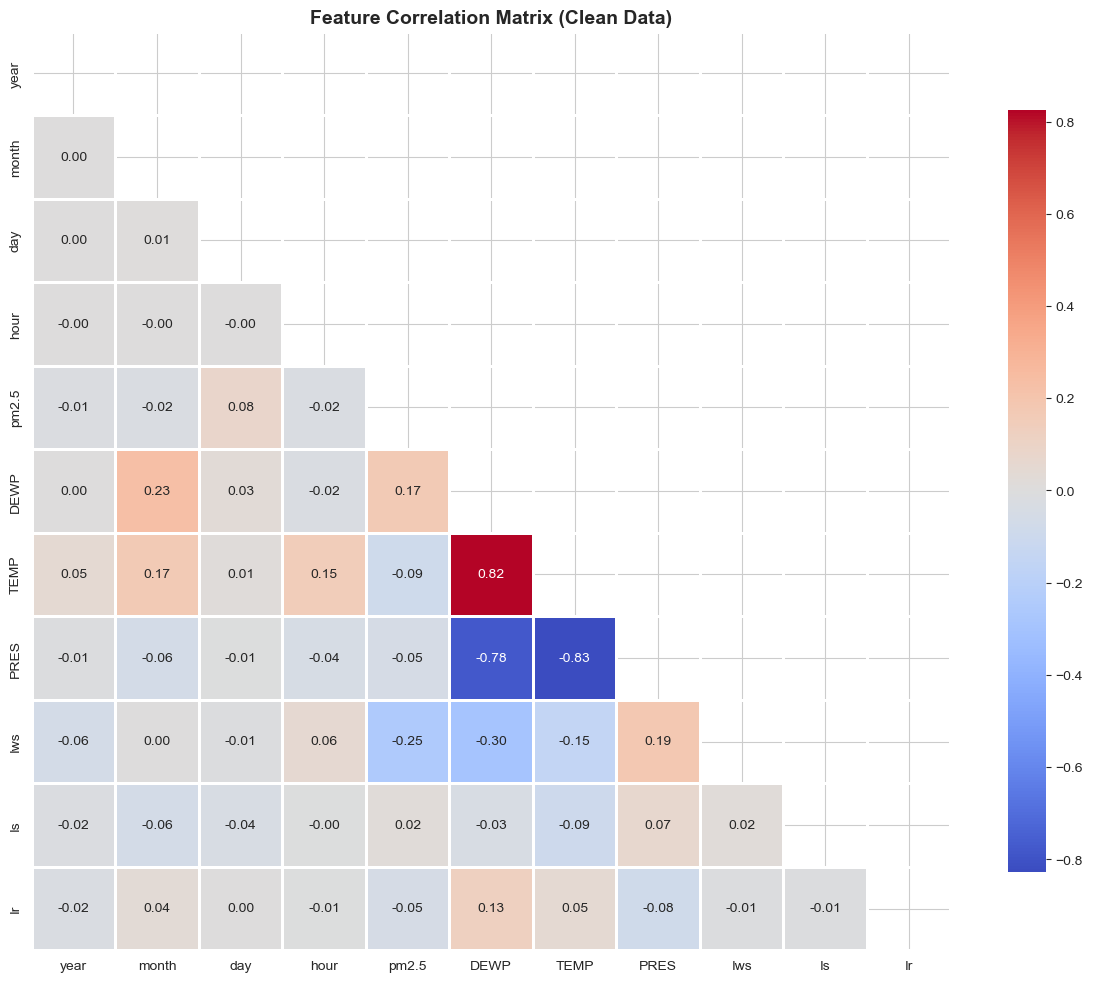


Strongest correlations with PM₂.₅ (Clean Data):
DEWP     0.171423
day      0.082788
Is       0.019266
year    -0.014690
hour    -0.023116
month   -0.024069
PRES    -0.047282
Ir      -0.051369
TEMP    -0.090534
Iws     -0.247784
Name: pm2.5, dtype: float64


In [43]:
# Select numeric columns for correlation from chunks_df_cleaned
numeric_df = df.select_dtypes(include=[np.number])

# Remove 'No' column if present
if 'No' in numeric_df.columns:
    numeric_df = numeric_df.drop(columns=['No'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix (Clean Data)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Find strongest correlations with PM2.5
pm25_corr = corr_matrix['pm2.5'].drop('pm2.5').sort_values(ascending=False)
print("\nStrongest correlations with PM₂.₅ (Clean Data):")
print(pm25_corr)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Prepare data for PCA: select only numeric features, excluding temporal and target variables
pca_cols = [col for col in df.select_dtypes(include=[np.number]).columns 
            if col not in ['No', 'year', 'month', 'day', 'hour', 'pm2.5']]

print(f"Features utilizzate per PCA: {pca_cols}")
print(f"Numero totale di features: {len(pca_cols)}")

# Extract data and handle missing values (including PM2.5 for correlation analysis)
df_pca = df.dropna()
df_pca = df_pca[pca_cols ]

print(f"\nDimensioni dataset PCA: {df_pca.shape}")
print(f"Righe rimosse per valori mancanti: {len(df) - len(df_pca)}")

# Separate features and target
X_pca_features = df_pca[pca_cols]
pm25_for_pca = df_pca['pm2.5']

# Standardize features (crucial for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca_features)

# Perform PCA with all components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

print(f"\nPCA completata con {pca.n_components_} componenti")

Features utilizzate per PCA: ['DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir']
Numero totale di features: 6

Dimensioni dataset PCA: (41757, 7)
Righe rimosse per valori mancanti: 2067

PCA completata con 6 componenti


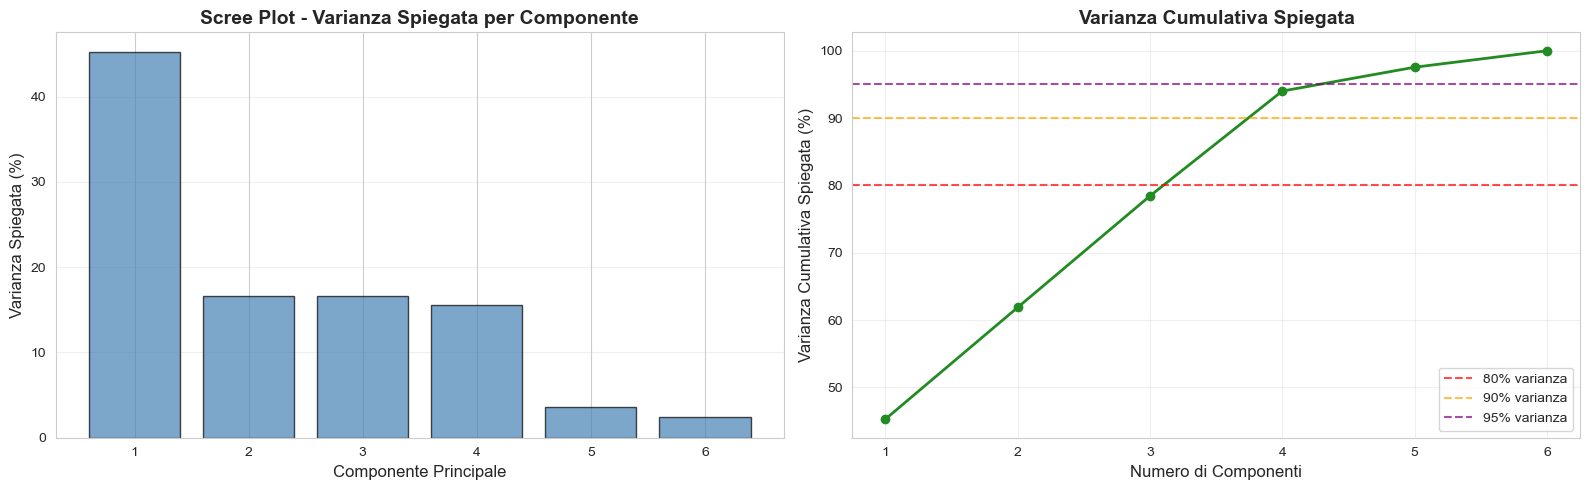


ANALISI VARIANZA SPIEGATA
Componenti necessarie per 80% varianza: 4 (66.7% delle features originali)
Componenti necessarie per 90% varianza: 4 (66.7% delle features originali)
Componenti necessarie per 95% varianza: 5 (83.3% delle features originali)
Componenti necessarie per 99% varianza: 6 (100.0% delle features originali)

VARIANZA PER COMPONENTE (prime 10)
PC1: 45.26% (cumulativa: 45.26%)
PC2: 16.60% (cumulativa: 61.87%)
PC3: 16.56% (cumulativa: 78.43%)
PC4: 15.59% (cumulativa: 94.01%)
PC5: 3.54% (cumulativa: 97.55%)
PC6: 2.45% (cumulativa: 100.00%)


In [52]:
# Analyze variance explained by each component
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Scree plot - Variance explained by each component
axes[0].bar(range(1, len(explained_variance_ratio) + 1), 
           explained_variance_ratio * 100, 
           alpha=0.7, color='steelblue', edgecolor='black')
axes[0].set_xlabel('Componente Principale', fontsize=12)
axes[0].set_ylabel('Varianza Spiegata (%)', fontsize=12)
axes[0].set_title('Scree Plot - Varianza Spiegata per Componente', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

# Cumulative variance plot
axes[1].plot(range(1, len(cumulative_variance) + 1), 
            cumulative_variance * 100, 
            marker='o', linestyle='-', linewidth=2, markersize=6, color='forestgreen')
axes[1].axhline(y=80, color='red', linestyle='--', alpha=0.7, label='80% varianza')
axes[1].axhline(y=90, color='orange', linestyle='--', alpha=0.7, label='90% varianza')
axes[1].axhline(y=95, color='purple', linestyle='--', alpha=0.7, label='95% varianza')
axes[1].set_xlabel('Numero di Componenti', fontsize=12)
axes[1].set_ylabel('Varianza Cumulativa Spiegata (%)', fontsize=12)
axes[1].set_title('Varianza Cumulativa Spiegata', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\n{'='*80}")
print("ANALISI VARIANZA SPIEGATA")
print(f"{'='*80}")
for threshold in [80, 90, 95, 99]:
    n_components = np.argmax(cumulative_variance >= threshold/100) + 1
    print(f"Componenti necessarie per {threshold}% varianza: {n_components} ({n_components/len(pca_cols)*100:.1f}% delle features originali)")

print(f"\n{'='*80}")
print("VARIANZA PER COMPONENTE (prime 10)")
print(f"{'='*80}")
for i in range(min(10, len(explained_variance_ratio))):
    print(f"PC{i+1}: {explained_variance_ratio[i]*100:.2f}% (cumulativa: {cumulative_variance[i]*100:.2f}%)")


ANALISI LOADINGS - Prime 4 Componenti Principali


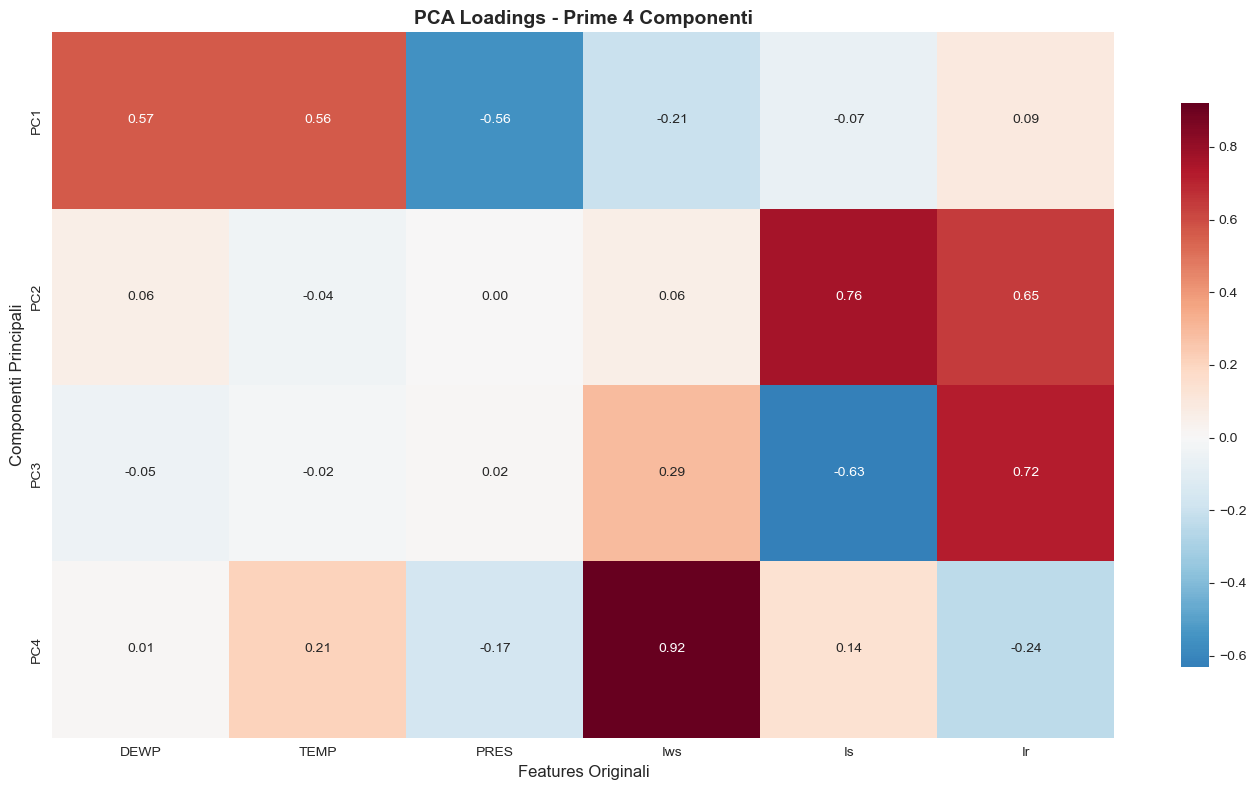


--------------------------------------------------------------------------------
PC1 (Varianza spiegata: 45.26%)
--------------------------------------------------------------------------------
Features più influenti:
  - DEWP           : +0.565 (|0.565|)
  - TEMP           : +0.563 (|0.563|)
  - PRES           : -0.556 (|0.556|)
  - Iws            : -0.205 (|0.205|)
  - Ir             : +0.085 (|0.085|)

--------------------------------------------------------------------------------
PC2 (Varianza spiegata: 16.60%)
--------------------------------------------------------------------------------
Features più influenti:
  - Is             : +0.758 (|0.758|)
  - Ir             : +0.645 (|0.645|)
  - Iws            : +0.064 (|0.064|)
  - DEWP           : +0.062 (|0.062|)
  - TEMP           : -0.042 (|0.042|)

--------------------------------------------------------------------------------
PC3 (Varianza spiegata: 16.56%)
--------------------------------------------------------------------

In [53]:
# Analyze component loadings to understand what each PC represents
loadings = pca.components_

# Select number of components to analyze in detail (e.g., enough for 90% variance)
n_components_to_analyze = np.argmax(cumulative_variance >= 0.90) + 1

print(f"\n{'='*80}")
print(f"ANALISI LOADINGS - Prime {n_components_to_analyze} Componenti Principali")
print(f"{'='*80}")

# Create heatmap of loadings
plt.figure(figsize=(14, 8))
sns.heatmap(loadings[:n_components_to_analyze, :], 
            xticklabels=pca_cols,
            yticklabels=[f'PC{i+1}' for i in range(n_components_to_analyze)],
            cmap='RdBu_r', 
            center=0, 
            annot=True, 
            fmt='.2f',
            cbar_kws={"shrink": 0.8})
plt.title(f'PCA Loadings - Prime {n_components_to_analyze} Componenti', fontsize=14, fontweight='bold')
plt.xlabel('Features Originali', fontsize=12)
plt.ylabel('Componenti Principali', fontsize=12)
plt.tight_layout()
plt.show()

# Print interpretation of each component
for i in range(n_components_to_analyze):
    print(f"\n{'-'*80}")
    print(f"PC{i+1} (Varianza spiegata: {explained_variance_ratio[i]*100:.2f}%)")
    print(f"{'-'*80}")
    
    # Get absolute loadings and sort
    abs_loadings = np.abs(loadings[i, :])
    sorted_indices = np.argsort(abs_loadings)[::-1]
    
    print("Features più influenti:")
    for idx in sorted_indices[:5]:  # Top 5 features
        feature_name = pca_cols[idx]
        loading_value = loadings[i, idx]
        print(f"  - {feature_name:15s}: {loading_value:+.3f} (|{abs_loadings[idx]:.3f}|)")

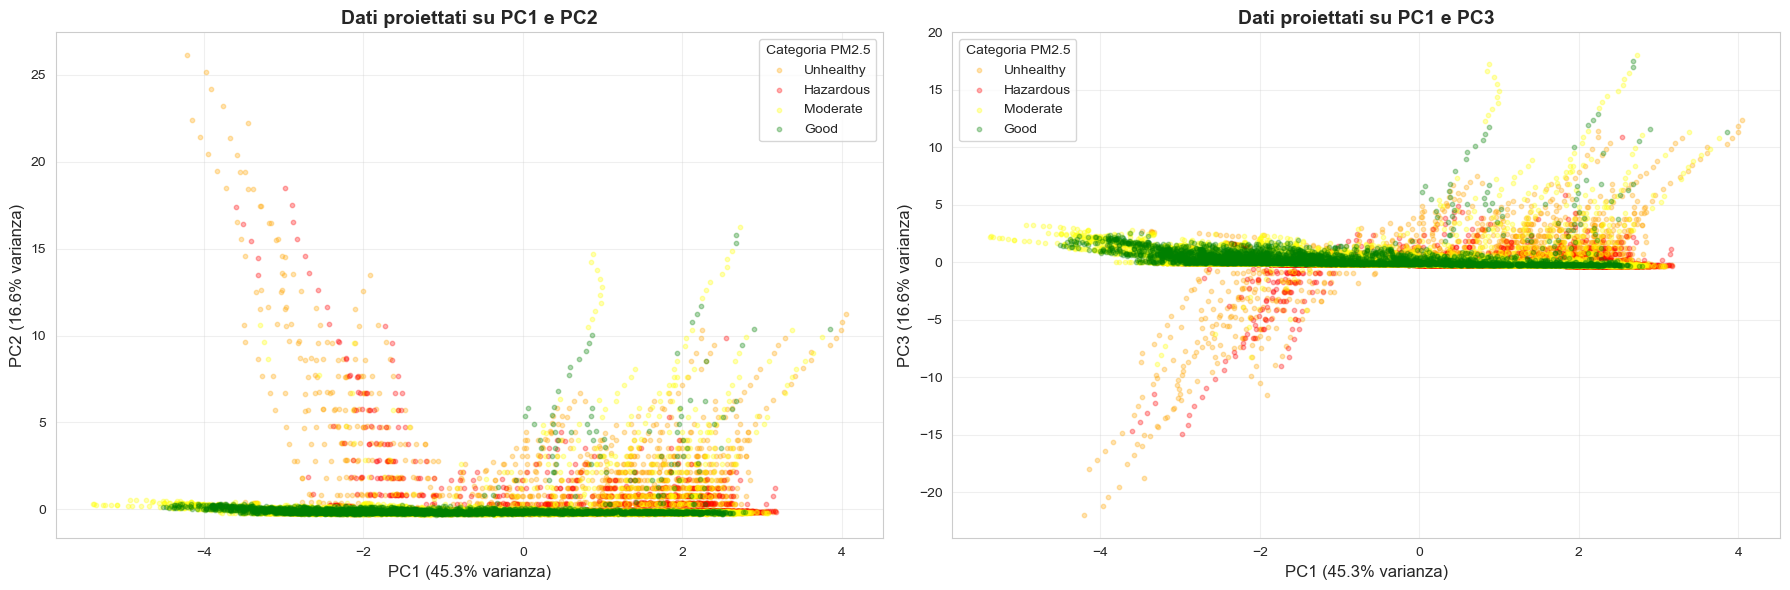

In [54]:
# Visualize data in PC space (first 2-3 components)
# PM2.5 values already extracted during PCA preparation (pm25_for_pca)

# Create categories for coloring
pm25_categories = categorize_pm25(pm25_for_pca, method='custom')

# Create scatter plots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# PC1 vs PC2
category_colors = {'Good': 'green', 'Moderate': 'yellow', 'Unhealthy': 'orange', 'Hazardous': 'red'}
for category in pm25_categories.unique():
    mask = pm25_categories == category
    axes[0].scatter(X_pca[mask, 0], X_pca[mask, 1], 
                   c=category_colors.get(category, 'gray'), 
                   label=category, 
                   alpha=0.3, 
                   s=10)

axes[0].set_xlabel(f'PC1 ({explained_variance_ratio[0]*100:.1f}% varianza)', fontsize=12)
axes[0].set_ylabel(f'PC2 ({explained_variance_ratio[1]*100:.1f}% varianza)', fontsize=12)
axes[0].set_title('Dati proiettati su PC1 e PC2', fontsize=14, fontweight='bold')
axes[0].legend(title='Categoria PM2.5', fontsize=10)
axes[0].grid(True, alpha=0.3)

# PC1 vs PC3
for category in pm25_categories.unique():
    mask = pm25_categories == category
    axes[1].scatter(X_pca[mask, 0], X_pca[mask, 2], 
                   c=category_colors.get(category, 'gray'), 
                   label=category, 
                   alpha=0.3, 
                   s=10)

axes[1].set_xlabel(f'PC1 ({explained_variance_ratio[0]*100:.1f}% varianza)', fontsize=12)
axes[1].set_ylabel(f'PC3 ({explained_variance_ratio[2]*100:.1f}% varianza)', fontsize=12)
axes[1].set_title('Dati proiettati su PC1 e PC3', fontsize=14, fontweight='bold')
axes[1].legend(title='Categoria PM2.5', fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

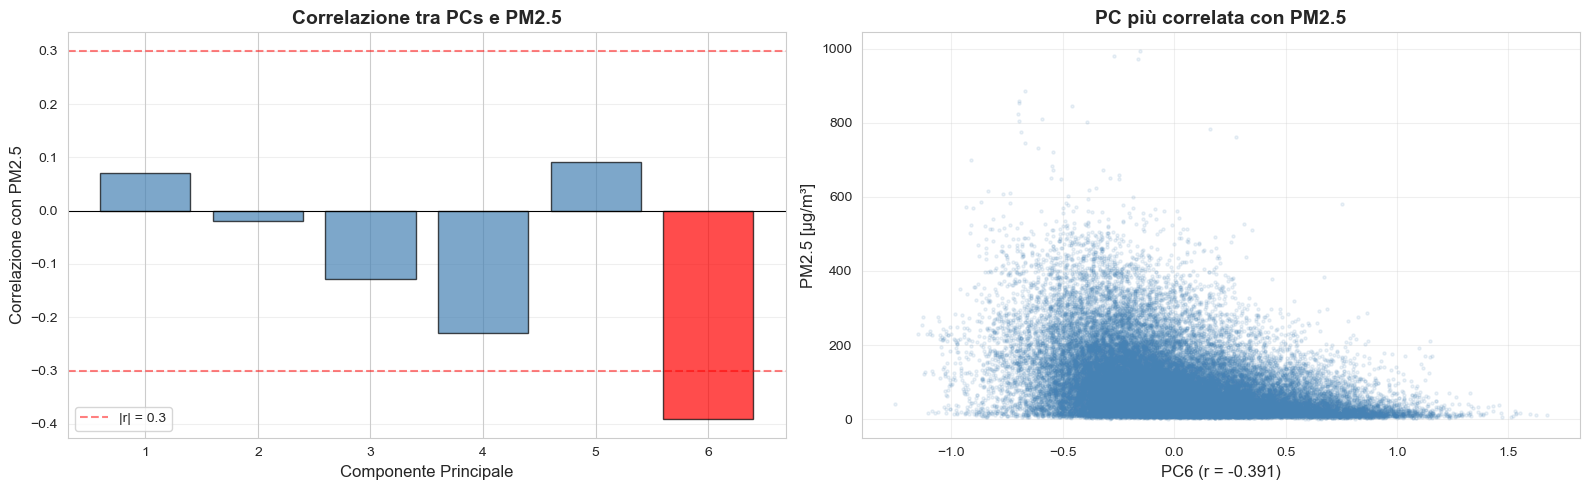


CORRELAZIONI PCs - PM2.5

Top 10 componenti per correlazione assoluta con PM2.5:
 1. PC6: r = -0.3912 (varianza: 2.45%)
 2. PC4: r = -0.2298 (varianza: 15.59%)
 3. PC3: r = -0.1288 (varianza: 16.56%)
 4. PC5: r = +0.0909 (varianza: 3.54%)
 5. PC1: r = +0.0712 (varianza: 45.26%)
 6. PC2: r = -0.0201 (varianza: 16.60%)


In [55]:
# Analyze correlation between principal components and PM2.5
# This helps identify which PCs might be useful as engineered features

pc_pm25_correlations = []
for i in range(pca.n_components_):
    corr = np.corrcoef(X_pca[:, i], pm25_for_pca)[0, 1]
    pc_pm25_correlations.append(corr)

pc_pm25_correlations = np.array(pc_pm25_correlations)

# Visualize correlations
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Bar plot of correlations
axes[0].bar(range(1, len(pc_pm25_correlations) + 1), 
           pc_pm25_correlations, 
           alpha=0.7, 
           color=['red' if abs(c) > 0.3 else 'steelblue' for c in pc_pm25_correlations],
           edgecolor='black')
axes[0].axhline(y=0, color='black', linewidth=0.8)
axes[0].axhline(y=0.3, color='red', linestyle='--', alpha=0.5, label='|r| = 0.3')
axes[0].axhline(y=-0.3, color='red', linestyle='--', alpha=0.5)
axes[0].set_xlabel('Componente Principale', fontsize=12)
axes[0].set_ylabel('Correlazione con PM2.5', fontsize=12)
axes[0].set_title('Correlazione tra PCs e PM2.5', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3, axis='y')

# Scatter plot of top correlated PC vs PM2.5
top_pc_idx = np.argmax(np.abs(pc_pm25_correlations))
axes[1].scatter(X_pca[:, top_pc_idx], pm25_for_pca, alpha=0.1, s=5, color='steelblue')
axes[1].set_xlabel(f'PC{top_pc_idx + 1} (r = {pc_pm25_correlations[top_pc_idx]:.3f})', fontsize=12)
axes[1].set_ylabel('PM2.5 [µg/m³]', fontsize=12)
axes[1].set_title(f'PC più correlata con PM2.5', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary
print(f"\n{'='*80}")
print("CORRELAZIONI PCs - PM2.5")
print(f"{'='*80}")
print(f"\nTop 10 componenti per correlazione assoluta con PM2.5:")
abs_corr_indices = np.argsort(np.abs(pc_pm25_correlations))[::-1]
for i, idx in enumerate(abs_corr_indices[:10], 1):
    print(f"{i:2d}. PC{idx+1}: r = {pc_pm25_correlations[idx]:+.4f} (varianza: {explained_variance_ratio[idx]*100:.2f}%)")

### Feature Engineering da PCA

Basandoci sull'analisi PCA, possiamo creare nuove features ingegnerizzate:

1. **Componenti con alta varianza**: Le prime componenti catturano i pattern principali nei dati
2. **Componenti correlate con PM2.5**: Componenti con correlazione significativa possono essere features predittive
3. **Interpretazione fisica**: Analizzare i loadings per creare features con significato fisico

Creiamo alcune feature candidate: